<a href="https://colab.research.google.com/github/BennettLovejoy/Portfolio/blob/main/Advanced_Folium_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import folium

m = folium.Map(location=(40.0675676,-83.015471), tiles="cartodb positron")
m
#m.save("index.html")


In [ ]:
m = folium.Map([40.0675676,-83.015471], zoom_start=12, tiles="cartodb positron")

# Write function to get coordinates, name, relevant data from each school in XYZ dataset

folium.Marker(
    location=[40.0675676,-83.015471],
    tooltip="Click me!",
    popup="School Name",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[40.0675676,-83.015471],
    tooltip="Click me!",
    popup="Current Location",
    icon=folium.Icon(color="green"),
).add_to(m)

m

In [ ]:
#for i in all_coords:
    #folium.Marker(i).add_to(m)


[Bureau of Labor Statistics API Sample Python Code](https://www.bls.gov/developers/api_python.htm)

In [ ]:
!pip install bls

In [ ]:
import requests
import json
import prettytable
import bls

## U.S. Bureau of Labor Statistics (BLS) Application Programming Interface with Python: guided examples [website](https://www.bd-econ.com/blsapi.html)

v1

In [ ]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [ ]:
# BLS series id for the civilian labor force participation rate
series = {'id': 'LNS11300000',
          'name': 'Labor Force Participation Rate'}

In [ ]:
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/LNS11300000


In [ ]:
import requests

r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_SUCCEEDED


In [ ]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [ ]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2024', 'period': 'M07', 'periodName': 'July', 'latest': 'true', 'value': '62.7', 'footnotes': [{}]}


In [ ]:
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.tail(3)

<ipython-input-41-08aa03f2c571>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  index = pd.to_datetime(dates)


,LNS11300000,footnotes
2024-01-01 00:00:05,62.5,{}
2024-01-01 00:00:06,62.6,{}
2024-01-01 00:00:07,62.7,{}


<Axes: title={'center': 'Labor Force Participation Rate'}>

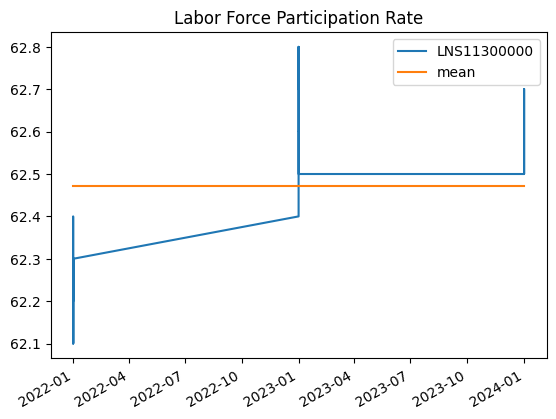

In [ ]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

v2

In [ ]:
!pip install config

In [ ]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

## Using the Bureau of Economic Analysis Python API Library Part 1
[Youtube Video for Reference](https://www.youtube.com/watch?v=wZjA6d2WDYk)

In [ ]:
!pip install python-bea

In [ ]:
!pip install pybea configparser

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving first_config.ini to first_config.ini


In [ ]:
from configparser import ConfigParser

# Initialize ConfigParser and read the uploaded configuration file
config = ConfigParser()
config.read('first_config.ini')  # The file should be in the root directory after upload

# Grab the API key from the specified section and key in the config file
API_KEY = config.get('ben_BEA_credentials', 'API_KEY')

print(API_KEY)  # Just to verify if it works (you can remove this after testing)

1F02FE55-8E16-41E9-A896-18FC11C393E0


In [54]:
from pprint import pprint
from configparser import ConfigParser
from pybea.client import BureauEconomicAnalysisClient

# Grab my API Key
config = ConfigParser()
config.read('configs/config.ini')

# Initialize API Client
bea_client = BureauEconomicAnalysisClient(api_key=API_KEY)

# Grab the dataset list.
#dataset_list = bea_client.get_dataset_list()
#pprint(dataset_list)


https://apps.bea.gov/api/data/?UserID=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GETDATASETLIST&ResultFormat=JSON
{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'USERID',
                                          'ParameterValue': '1F02FE55-8E16-41E9-A896-18FC11C393E0'},
                                         {'ParameterName': 'METHOD',
                                          'ParameterValue': 'GETDATASETLIST'},
                                         {'ParameterName': 'RESULTFORMAT',
                                          'ParameterValue': 'JSON'}]},
            'Results': {'Dataset': [{'DatasetDescription': 'Standard NIPA '
                                                           'tables',
                                     'DatasetName': 'NIPA'},
                                    {'DatasetDescription': 'Standard NI '
                                                           'underlying detail '
                                                           't

# Grab Parameters List


In [93]:
parameters_set_list = bea_client.get_parameters_list(dataset_name='Regional')
# pprint(parameters_set_list)


https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GETPARAMETERLIST&datasetname=Regional&resultformat=JSON


## Part II of Youtube Video
[Youtube video for reference](https://www.youtube.com/watch?v=wZjA6d2WDYk)

# Grab GDP numbers for finance and insurance industry

In [82]:
gdp_by_industry = bea_client.gdp_by_industry(
    year = 'ALL',
    industry= '52',
    frequency = ['A']
)
#pprint(gdp_by_industry)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=GDPbyIndustry&year=ALL&resultformat=JSON&industry=52&frequency=A&tableid=ALL


# Grab the national product and income data


In [83]:
national_income = bea_client.national_income_and_product_accounts(
    table_name = 'T10101',
    frequency = ['A', 'Q'],
    year = ['2010, 2012']
)
#pprint(national_income)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=NIPA&year=2010%2C+2012&resultformat=JSON&frequency=A%2CQ&tablename=T10101


# Grab detailed data


In [84]:
national_income = bea_client.national_income_and_product_accounts_detail(
    table_name = 'U20305',
    frequency = ['A', 'Q'],
    year = ['2010, 2012']
)
#pprint(national_income)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=NIUnderlyingDetail&year=2010%2C+2012&resultformat=JSON&frequency=A%2CQ&tablename=U20305


# Grab fixed assets data

In [85]:
fixed_assets = bea_client.fixed_assets(
   table_name = 'FAAt201',
   year = ['2010, 2012']
)
#pprint(fixed_assets)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=FixedAssets&year=2010%2C+2012&resultformat=JSON&tablename=FAAt201



# Direct investments and multinational enterprises

In [86]:
investments = bea_client.direct_investments_and_multinational_enterprises(
    direction_of_investment = 'outward',
    classification = 'country',
    year = '2010',
    country = ['650', '699']
)
#pprint(investments)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=MNE&year=2010&country=650%2C699&industry=ALL&seriesid=ALL&classification=country&directionofinvestment=outward&resultformat=JSON&getfootnotes=Yes


# Get US Direct Investment Positions

In [87]:
investments = bea_client.activities_investments_and_multinational_enterprises(
    direction_of_investment = 'outward',
    classification = 'CountryByIndustry',
    series_id = ['4', '5'],
    year = ['2011', '2012'],
    country = '202',
    ownership_level= False,
    industry = 'ALL',
    non_bank_affilates_only= False
    )
#pprint(investments)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=MNE&year=2011%2C2012&nonbankaffiliatesonly=0&ownershiplevel=0&state=ALL&country=202&industry=ALL&seriesid=4%2C5&classification=CountryByIndustry&directionofinvestment=outward&resultformat=JSON&getfootnotes=Yes


# Grab the Balance of Goods

In [88]:
balance_of_goods = bea_client.international_transactions(
    indicator=['BalGds'],
    frequency=['A', 'Q'],
    year=['2010', '2012'],
    area_or_country= ['China'],
)
#pprint(balance_of_goods)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=ITA&indicator=BalGds&year=2010%2C2012&frequency=A%2CQ&areaorcountry=China&resultformat=JSON


# Grab US Assets

In [89]:
us_assets = bea_client.international_investments_positions(
    type_of_investment = ['FinAssetsExclFinDeriv'],
    component = ['ChgPosPrice'],
    year = ['ALL'],
    frequency = ['A'],
)
#pprint(us_assets)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=IIP&year=ALL&frequency=A&component=ChgPosPrice&typeofinvestment=FinAssetsExclFinDeriv&resultformat=JSON


# Input Output Data

In [90]:
input_output_data = bea_client.input_output_statstics(
    table_id = ['56'],
    year = ['2010', '2012']
)
#pprint(input_output_data)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=InputOutput&year=2010%2C2012&tableid=56&resultformat=JSON


# Grab Underlying GDP by Industry

In [91]:
underlying_gdp_by_industry = bea_client.underlying_gdp_by_industry(
    industry = 'ALL',
    year = ['2010', '2012'],
    frequency = ['A'],
    table_id = ['ALL']
)

#pprint(underlying_gdp_by_industry)

https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=underlyingGDPbyIndustry&year=2010%2C2012&resultformat=JSON&industry=ALL&frequency=A&tableid=ALL


# Grab International Trade Services

In [92]:
international_trade_services = bea_client.international_trade_services(
    type_of_service='AllServiceTypes',
    trade_direction=['Imports'],
    year = ['2014', '2015'],
    affiliation = ['AllAffiliations'],
    area_or_country = ['Germany'],
)
#pprint(international_trade_services)


https://apps.bea.gov/api/data/?userid=1F02FE55-8E16-41E9-A896-18FC11C393E0&method=GetData&datasetname=IntlServTrade&year=2014%2C2015&resultformat=JSON&typeofservice=AllServiceTypes&tradedirection=Imports&affiliation=AllAffiliations&areaorcountry=Germany
